# Colab Lab: Filter Methods for Feature Selection

This notebook contains six self-contained exercises. Each section includes problem description, solution overview, and complete code cells you can copy & paste into Colab. Execute each code block in order.

---

## Exercise 1: Variance Threshold (Basic Selection)

**Problem Description:**  
Low-variance features carry little information. Removing them reduces noise and model complexity.

**Solution Overview:**  
Use `VarianceThreshold` to drop features below a variance threshold. Explore thresholds 0.2, 0.6, and 0.8 and plot variances.



In [6]:
# 1.1 Setup
!pip install scikit-learn pandas matplotlib seaborn --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold

In [7]:
# 1.2 Load Data
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
print("Original features:", list(X.columns))

Original features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


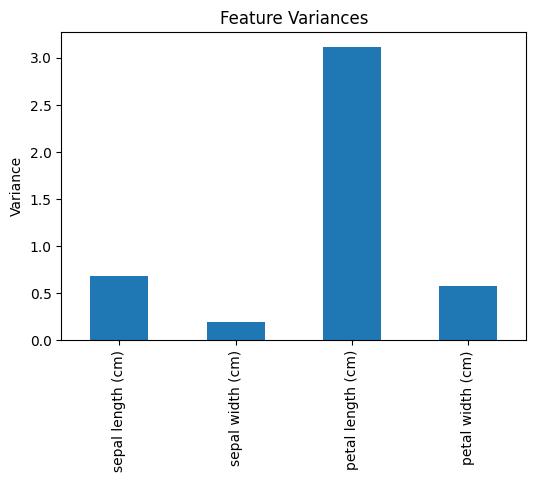

In [8]:
# 1.3 Compute Feature Variances & Plot
variances = X.var()
plt.figure(figsize=(6,4))
variances.plot(kind='bar', title='Feature Variances')
plt.ylabel('Variance')
plt.show()

In [9]:
# 1.4 Apply VarianceThreshold for different thresholds
for thresh in [0.2, 0.6, 0.8]:
  sel = VarianceThreshold(threshold=thresh)
  X_sel = sel.fit_transform(X)
  kept = X.columns[sel.get_support()]
  print(f"Threshold={thresh}: kept features →", list(kept))

Threshold=0.2: kept features → ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']
Threshold=0.6: kept features → ['sepal length (cm)', 'petal length (cm)']
Threshold=0.8: kept features → ['petal length (cm)']


# 1.4 Analysis
* Which features were removed?
* How does changing the threshold to 0.2 or 0.8 affect the selected set?
* Plot the variances of all features as a bar chart.

# Exercise 1: Variance Threshold
## Analysis to Include in Code

In [10]:
# 1. Removed vs. Kept Features
removed = set(X.columns) - set(kept)
print("Removed features:", removed)


Removed features: {'sepal length (cm)', 'sepal width (cm)', 'petal width (cm)'}


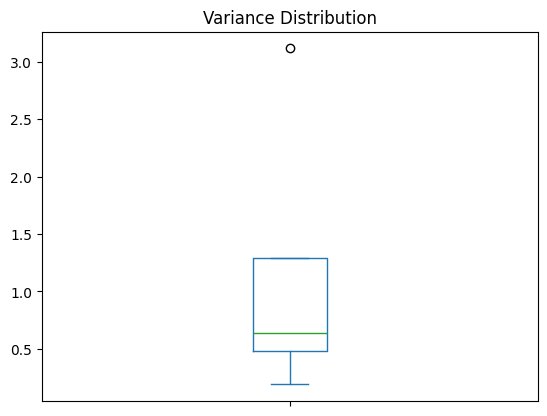

In [11]:
# 2. Variance Distribution
variances.sort_values().plot(kind='box', title="Variance Distribution")
plt.show()


In [12]:
# 3. Threshold Sensitivity
results = []
for t in np.linspace(0, variances.max(), 10):
    sel = VarianceThreshold(threshold=t)
    results.append((t, sel.fit(X).get_support().sum()))
pd.DataFrame(results, columns=['threshold','n_kept']).plot(x='threshold', y='n_kept', marker='o')
plt.title("Features Kept vs. Threshold")
plt.show()


ValueError: No feature in X meets the variance threshold 3.11628